In [504]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [505]:
data = pd.read_csv("Position_Salaries.csv")

In [506]:
data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [507]:
#Taking the data into the arrays X and y on which the model will be applied
X = data['Level'].values.reshape(-1,1)
y = data['Salary'].values.reshape(-1,1)

In [508]:
m, n = X.shape

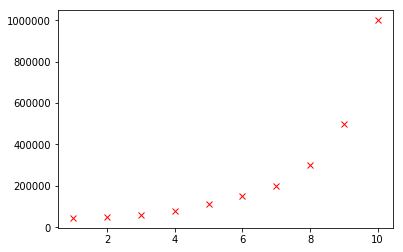

In [509]:
#Plotting X vs y to visualize the dataset. We can see it is suitable for polynomail regression
plt.plot(X, y, 'rx')

In [510]:
#Stacking a constant of ones i.e. bias factor
X = np.hstack((np.ones((m, 1)), X))

In [511]:
#To create a model of degree 4
X = np.hstack((
    X,
    (X[:, 1] ** 2).reshape((m, 1)),
    (X[:, 1] ** 3).reshape((m, 1)),
    (X[:, 1] ** 4).reshape((m, 1))
))

In [512]:
#Resetting the value of n
m, n = X.shape

In [513]:
#Normalisation
X[:, 1:] = (X[:, 1:] - np.mean(X[:, 1:], axis=0)) / np.std(X[:, 1:], axis=0)

In [514]:
#Resetting the axis
X = (X+1.5)*(10/3)

In [515]:
#Defing the hypothesis function i.e. multiplying X with it's respective coefficients
def h(X, theta):
    return X @ theta

In [516]:
#Initializing theta with random values
theta = np.random.rand(n)
predictions = h(X, theta)

In [517]:
#Transforming shape of y from (m,1) to (m,) for further use
y.shape = (y.shape[0],)

In [518]:
#Defining the cost function
def J(theta, X, y):
    return np.mean(np.square(h(X, theta) - y))

In [519]:
#Defining the learning rate
alpha = 0.01

In [520]:
#Training the model as well as calculating loss
losses = []
for _ in range(1000):
    theta = theta - alpha * (1/m) * (X.T @ ((X @ theta) - y))
    losses.append(J(theta, X, y))

In [521]:
#Shifting the axis
X = X + 0.4

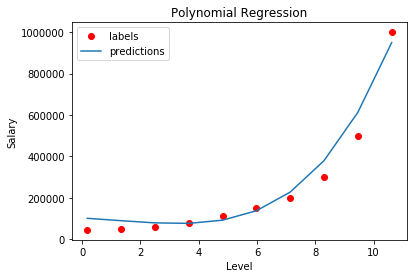

In [522]:
#Plotting the graph
predictions = h(X, theta)
plt.plot(X[:, 1], y, 'ro' ,label='labels')
plt.plot(X[:, 1], predictions, label='predictions')
plt.title('Polynomial Regression')
plt.xlabel('Level') 
plt.ylabel('Salary') 
plt.legend()


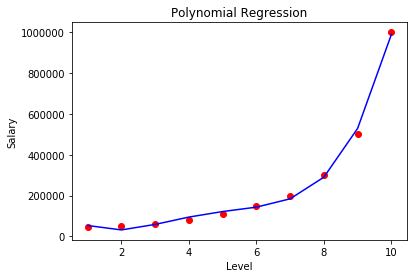

In [523]:
#Polynomial Regression Using SciKit Learn
X1 = data['Level'].values.reshape(-1,1)
y1 = data['Salary'].values.reshape(-1,1)

from sklearn.linear_model import LinearRegression 
lin = LinearRegression() 
  
lin.fit(X1, y1) 
from sklearn.preprocessing import PolynomialFeatures 
  
poly = PolynomialFeatures(degree = 4) 
X1_poly = poly.fit_transform(X1) 
  
poly.fit(X1_poly, y1) 
lin2 = LinearRegression() 
lin2.fit(X1_poly, y1) 
plt.scatter(X1, y1,color = 'red') 
  
plt.plot(X1, lin2.predict(poly.fit_transform(X1)),color = 'blue') 
plt.title('Polynomial Regression')
plt.xlabel('Level') 
plt.ylabel('Salary') 
  
plt.show() 